In [1]:
%load_ext autoreload
%autoreload 2
from utils_synthetic import *

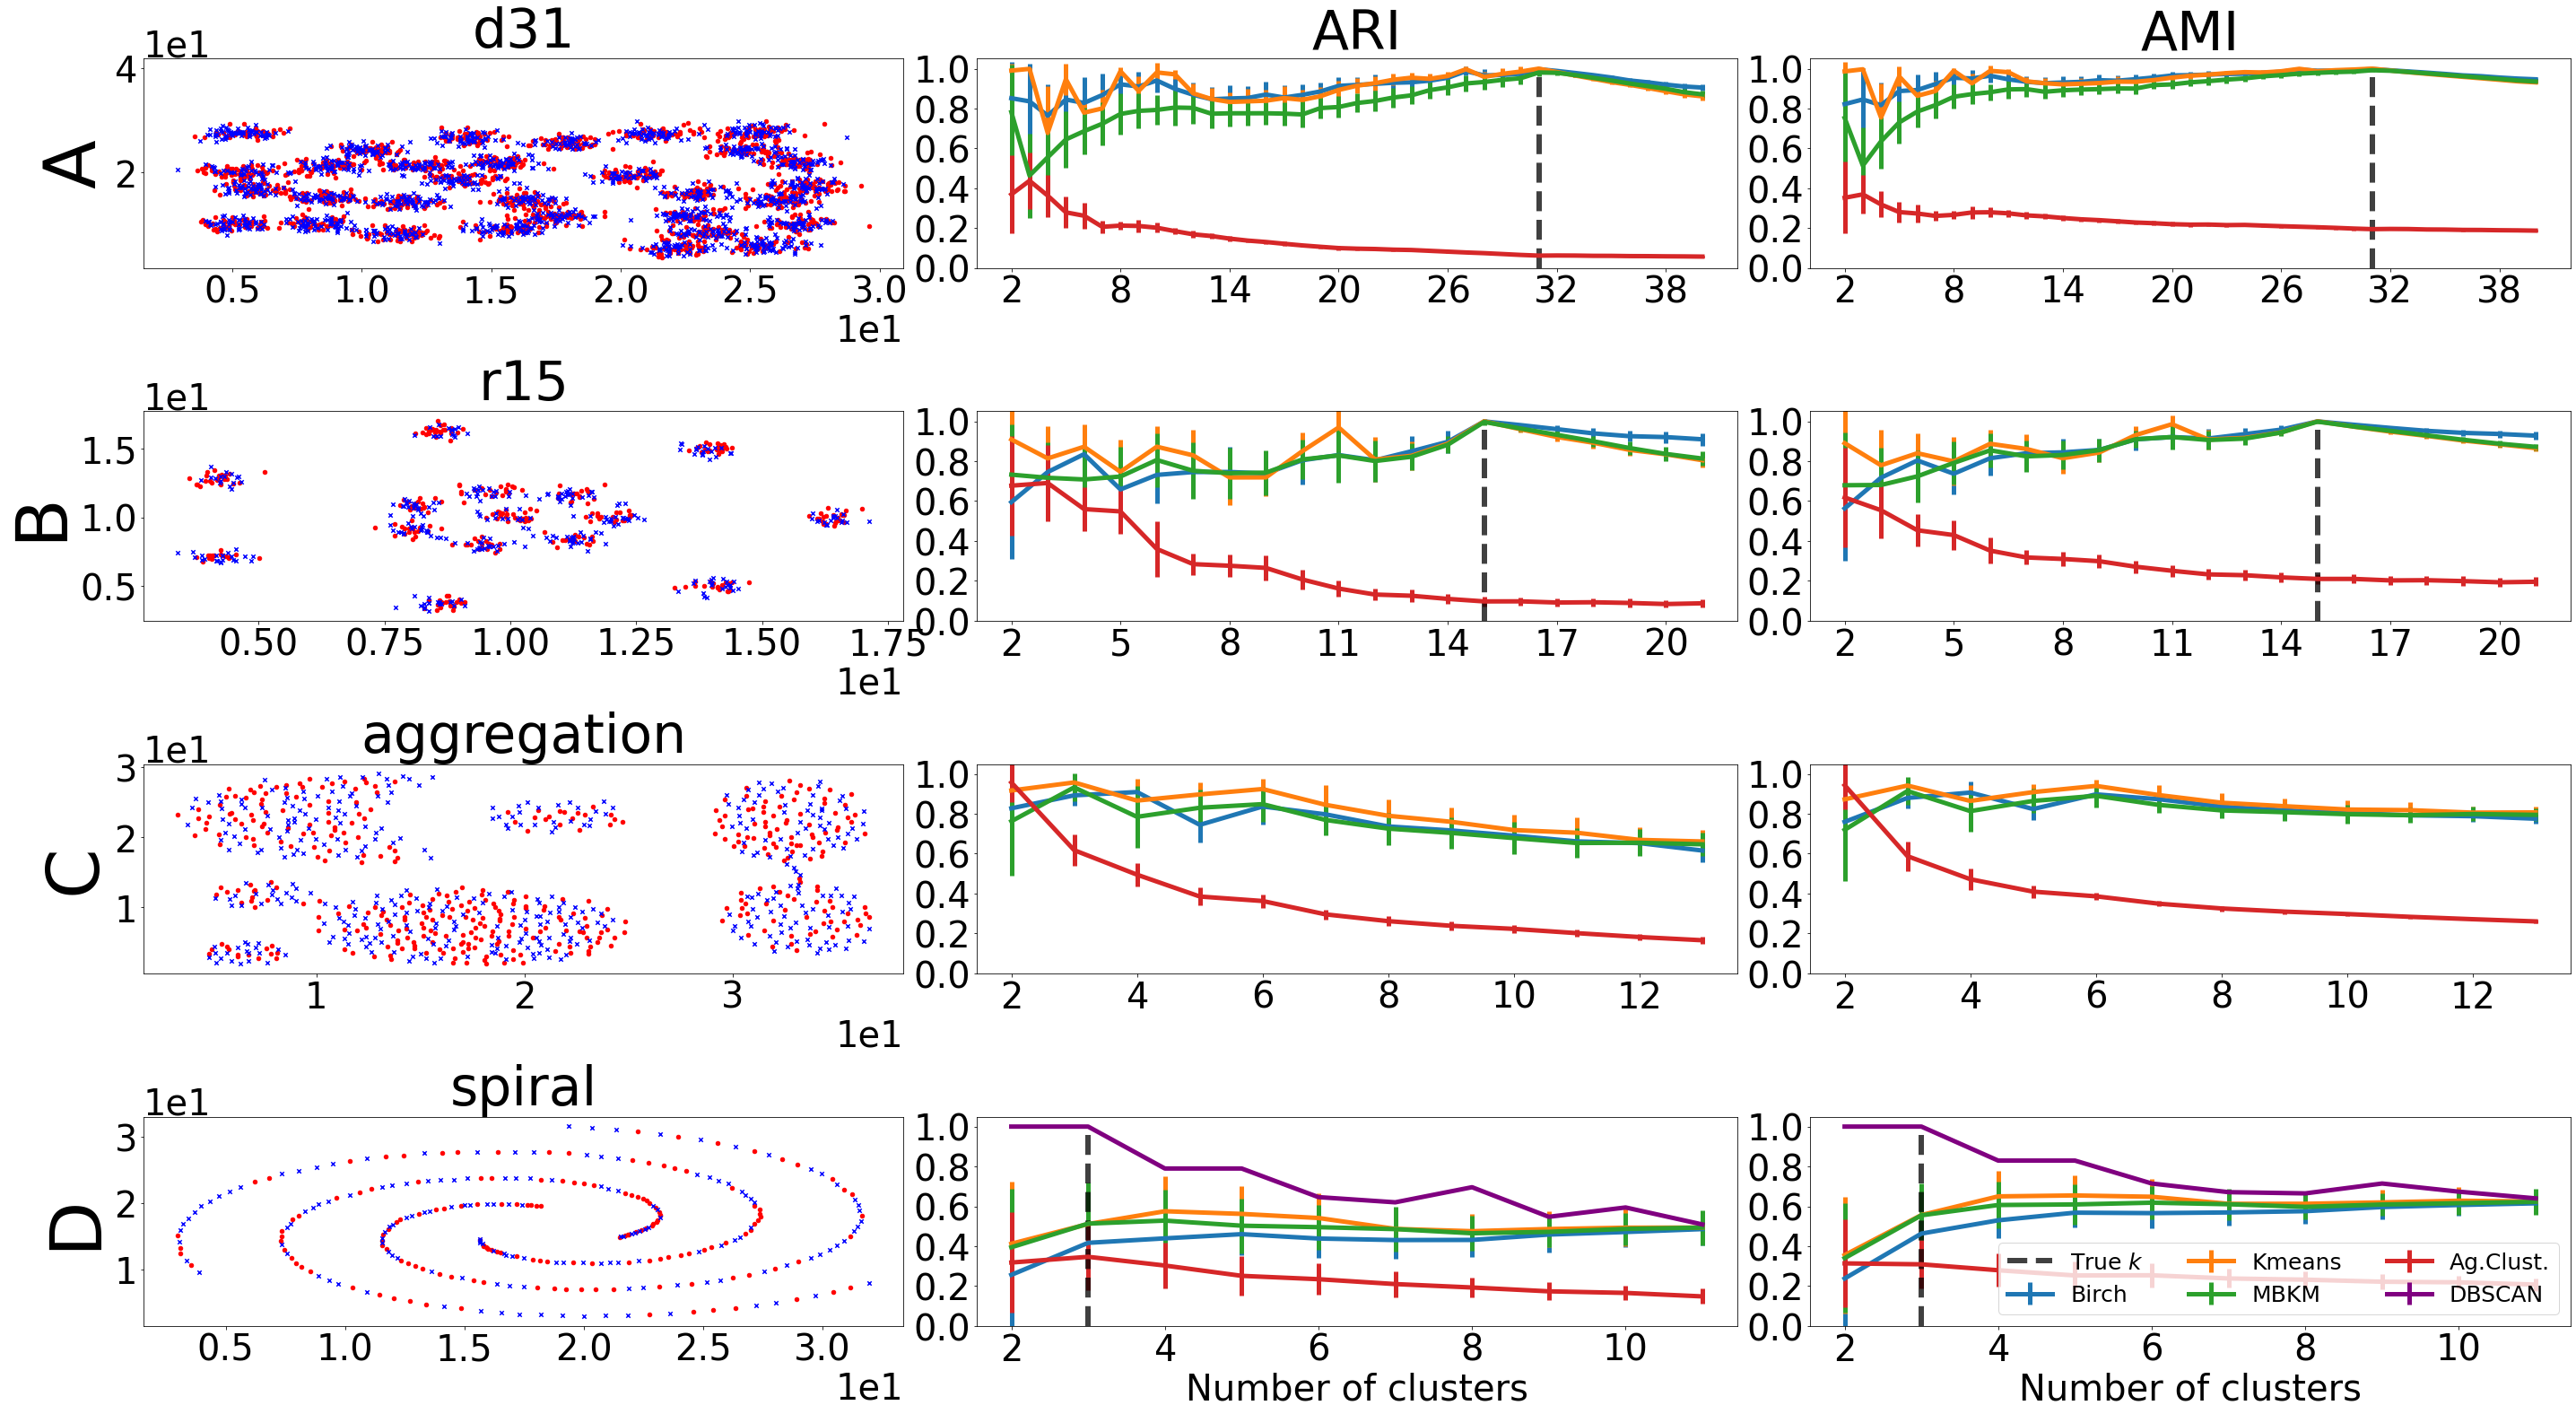

In [2]:
'''
    Run this code block to reproduce Fig. 1 in the main paper
'''

exercise_1 = np.load('Results/exercise_1.npy', allow_pickle=1).item() # load results
results_ex_1 = {} 
methods_list = ['Birch', 'Kmeans', 'MiniBatchKMeans', 'AgglomerativeClustering'] #list of clustering algorithms considered

for key in exercise_1.keys():
    results_ex_1[key] = {}
    for method in methods_list:
        
        
        if method == 'AffinityPropagation':
            results_ex_1[key][method] = {}
            results_ex_1[key][method]['mean_ari'], results_ex_1[key][method]['mean_ami'] = np.mean(exercise_1[key][method]['ari']), np.mean(exercise_1[key][method]['ami'])
            results_ex_1[key][method]['std_ari'], results_ex_1[key][method]['std_ami'] = np.std(exercise_1[key][method]['ari']), np.std(exercise_1[key][method]['ami'])
        else:
            results_ex_1[key][method] = {}
            results_ex_1[key][method]['mean_ari'], results_ex_1[key][method]['mean_ami'] = np.mean(exercise_1[key][method]['ari'], axis = 1), np.mean(exercise_1[key][method]['ami'], axis = 1)
            results_ex_1[key][method]['std_ari'], results_ex_1[key][method]['std_ami'] = np.std(exercise_1[key][method]['ari'], axis = 1), np.std(exercise_1[key][method]['ami'], axis = 1)
        
        
        if key == 'spiral':
            results_ex_1[key]['DBSCAN'] = {}
            results_ex_1[key]['DBSCAN']['mean_ari'], results_ex_1[key]['DBSCAN']['mean_ami'] = np.mean(exercise_1[key]['DBSCAN']['ari'][1:], axis = 1), np.mean(exercise_1[key]['DBSCAN']['ami'][1:], axis = 1)
            results_ex_1[key]['DBSCAN']['std_ari'], results_ex_1[key]['DBSCAN']['std_ami'] = np.std(exercise_1[key]['DBSCAN']['ari'][1:], axis = 1), np.std(exercise_1[key]['DBSCAN']['ami'][1:], axis = 1)

sizes = [39, 20, 12, 10] # max number of clusters for each dataset
true_k = [31, 15, None, 3] # true number of clusters in each dataset
ex_plots =  ['d31',  'r15', 'aggregation', 'spiral'] # dataset banes

plot_synth_1(results_ex_1, methods_list, ex_plots, sizes, true_k, 'Plots/exercise_1')

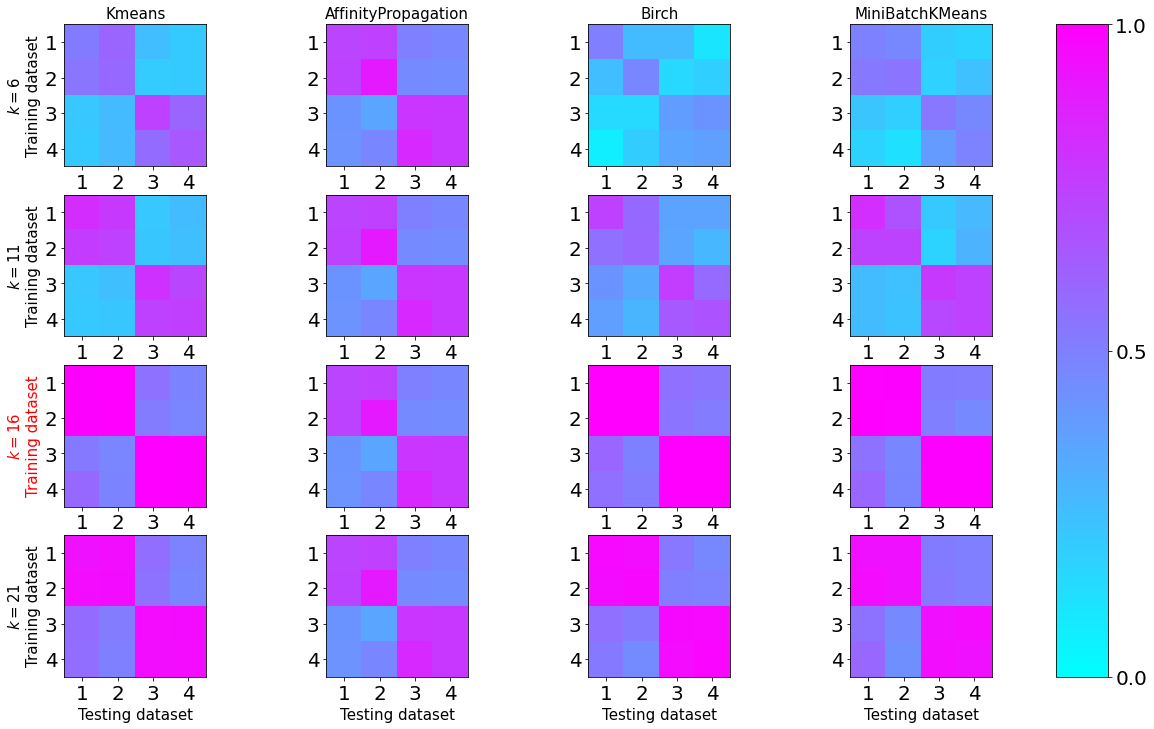

In [3]:
'''
    Run this code block to reproduce Fig. 2 in the main paper
'''

exercise_2 = np.load('Results/exercise_2.npy', allow_pickle=1).item() #load results
results_ex_2 = {}
methods_list = ['AffinityPropagation', 'Birch', 'Kmeans', 'MiniBatchKMeans'] #list of clustering algorithms considered

for key in exercise_2.keys(): # create dictionary for plotting
    results_ex_2[key] = {}
    for perm in exercise_2[key].keys():
        results_ex_2[key][perm] = {}
        for method in exercise_2[key][perm].keys():
            results_ex_2[key][perm][method] = {}
            results_ex_2[key][perm][method]['mean_ari'], results_ex_2[key][perm][method]['mean_ami'] = np.zeros([4,4,24]), np.zeros([4,4,24])
            results_ex_2[key][perm][method]['std_ari'], results_ex_2[key][perm][method]['std_ami'] = np.zeros([4,4,24]), np.zeros([4,4,24])
            for i_j in exercise_2[key][perm][method]['ari'].keys():
                i, j = int(i_j[0]), int(i_j[2])
                if method == 'AffinityPropagation':
                    for k in range(2,25):
                        results_ex_2[key][perm][method]['mean_ari'][i,j, k-2], results_ex_2[key][perm][method]['mean_ami'][i,j,k-2] = np.mean(exercise_2[key][perm][method]['ari'][i_j]), np.mean(exercise_2[key][perm][method]['ami'][i_j])
                        results_ex_2[key][perm][method]['std_ari'][i,j,k-2], results_ex_2[key][perm][method]['std_ami'][i,j,k-2] = np.std(exercise_2[key][perm][method]['ari'][i_j]), np.std(exercise_2[key][perm][method]['ami'][i_j])
                else:
                    results_ex_2[key][perm][method]['mean_ari'][i,j], results_ex_2[key][perm][method]['mean_ami'][i,j] = np.mean(exercise_2[key][perm][method]['ari'][i_j], axis = 1), np.mean(exercise_2[key][perm][method]['ami'][i_j], axis = 1)# 1 #np.mean(exercise_2[key][perm][method]['ari'][i_j], axis = 1), np.mean(exercise_2[key][method][perm]['ami'][i_j], axis = 1)
                    results_ex_2[key][perm][method]['std_ari'][i,j], results_ex_2[key][perm][method]['std_ami'][i,j] = np.std(exercise_2[key][perm][method]['ari'][i_j], axis = 1), np.std(exercise_2[key][perm][method]['ami'][i_j], axis = 1)
                    
for size in ['032', '064', '128', '256', '512', '1024']:
    if size == '064': # plot only the case in R^64
        plot_synth_2(results_ex_2, size, str(int(int(size)/2)), [5,10,15,20], True)

In [4]:
'''
    Run this code block to reproduce Figs. 3,4 in the main paper
'''

centroids_train, centroids_test = [[-2,-2], [1,2], [2,-2]], [[-2,-2], [1,2], [-1.25,.75]] # dataset centroids
train_weights, test_weights = [1/3, 1/3, 1/3], [1/3, 1/3, 1/3] # mixture component weights

n_train, n_test = 100, 100 # dataset sample sizes
train_ind, test_ind = np.random.choice(len(train_weights), size = n_train, p = train_weights), np.random.choice(len(test_weights), size = n_test, p = test_weights) # mixture assignments
train_set, test_set = generate_set(train_ind, centroids_train, .2), generate_set(test_ind, centroids_test, .2) # draw data

# define grid to evaluate replicability locally

boot_size  = len(train_set)
num_boot = 50
colors, colors_test = ['k', 'k', 'k'], ['k', 'k', 'k']

# load results

special_points = np.load('Results/special_points_3.npy')
score_ari = np.load('Results/score_ari_3.npy')
score_ami = np.load('Results/score_ami_3.npy')

# plotting setup

marker_d, marker_d_test = {}, {}
marker_d[0], marker_d[1], marker_d[2] = 'v', '^', 'X'
marker_d_test[0], marker_d_test[1], marker_d_test[2] = 'v', '^', 's'
m_ls, m_ls_test = [marker_d[train_ind_i] for train_ind_i in train_ind], [marker_d_test[test_ind_i] for test_ind_i in test_ind]

In [ ]:
'''
    Run this code block to reproduce Fig. 4 in the main paper
'''

n_clusters = len(train_weights) # number of clusters
num_boot = 1000 # number of bootstrap runs
num_points = n_train # number of points
dims = 2 # dimension p 
algorithm = 'k_means' # algorithm for replicability
metric = 'ari' # metric for replicability

cl_0, cl_1, cl_2 = np.array(centroids_test) # test points
marker_0, marker_1, marker_2 = 'x', '^', '+'
repro_plot_all(train_set=train_set, test_set=test_set, train_point_ls=[cl_0,cl_1,cl_2], block_train_ls = [0, 1, 2], num_clusters=3, num_boot=num_boot, boot_size= len(train_set), markers=m_ls_test, save = 'Plots/ind_cl', colorbar = True)


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

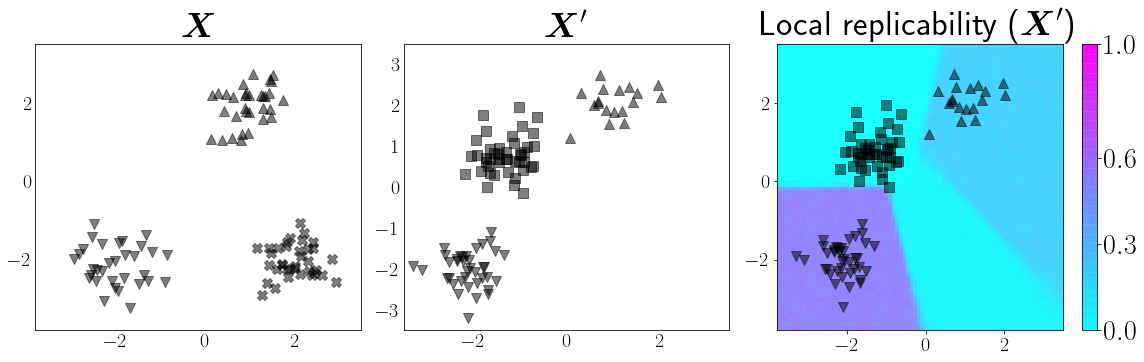

In [6]:
'''
    Run this code block to reproduce Fig. 3 in the main paper
'''

fig = plt.figure(figsize = (16,5))

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

ax = plt.subplot(131) # plot train set
for i, train_ind_i in enumerate(train_ind):
    plt.scatter(train_set[i,0], train_set[i,1], color = colors_test[train_ind_i], s = 100, alpha = .5, marker = m_ls[i])
plt.ylim(-3.8,3.5)
plt.xlim(-3.8,3.5)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

plt.title(r'$\boldsymbol{X}$', fontsize = 35)
ax.tick_params(axis='both', which='both', length=0)

ax = plt.subplot(132) # plot test set

for i, test_ind_i in enumerate(test_ind):
    plt.scatter(test_set[i,0], test_set[i,1], color = colors_test[test_ind_i], s = 100, alpha = .5, marker = m_ls_test[i])

ax.tick_params(axis='both', which='both', length=0)
plt.ylim(-3.5,3.5)
plt.xlim(-3.5,3.5)
plt.title(r'$\boldsymbol{X}^\prime$', fontsize = 35)

X, Y, Z = special_points[0], special_points[1], score_ari.mean(axis = -1)
Z_ = score_ami.mean(axis = -1)
ax = plt.subplot(133) # plot local replicability on test
plt.title(r'Local replicability ($\boldsymbol{X}^\prime$)', fontsize = 35)
ims = plt.imshow(Z, extent=[-3.8, 3.5, -3.8,3.5], origin= 'lower', cmap='cool', alpha=0.9,  vmin = 0, vmax= 1)

cbar = fig.colorbar(ims, ax=ax,  orientation='vertical', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=28)
cbar.set_ticks([0, .3, .6, 1])
for i, train_ind_i in enumerate(test_ind):
    ax.scatter(test_set[i,0], test_set[i,1], color = 'k', s = 100, alpha = .5, marker = m_ls_test[i])
        
for i, c in enumerate(centroids_train):
    if i == 1:
        c[0] +=.5
plt.tight_layout()
# plt.savefig('Plots/main_synth_3_b.pdf', dpi  = 1000, bbox_inches = 'tight')
plt.show()